### Electrical Faults Detection and Classsification

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('classData.csv')

In [3]:
df

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


# EDA

In [4]:
df.sample(7)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
1032,1,0,0,1,875.567858,55.669989,-1.815094,-0.085893,-0.168299,0.254192
1449,1,0,1,1,227.246377,620.259542,57.755343,0.041359,-0.303562,0.262203
1387,1,0,1,1,824.158664,-180.069972,31.056732,0.030934,-0.354943,0.324008
7752,0,0,0,0,-28.185556,92.657229,-67.369128,-0.614224,0.259343,0.354881
3926,0,1,1,1,831.001115,-152.871490,-676.072902,0.031281,-0.040332,0.009051
3819,0,1,1,1,210.030069,-847.546153,639.594066,-0.031816,-0.008305,0.040121
3707,0,1,1,1,-881.699795,402.996656,480.803607,-0.021546,0.042381,-0.020835


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [6]:
df.isnull().sum()

G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64

In [7]:
df.shape

(7861, 10)

In [8]:
df.describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,0.432006,0.411271,0.555527,0.571429,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515
std,0.495387,0.492095,0.496939,0.494903,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897
min,0.000000,0.000000,0.000000,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
25%,0.000000,0.000000,0.000000,0.000000,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977
50%,0.000000,0.000000,1.000000,1.000000,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281
75%,1.000000,1.000000,1.000000,1.000000,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973
max,1.000000,1.000000,1.000000,1.000000,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['G', 'C', 'B', 'A', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'], dtype='object')

In [11]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables :', len(numerical_features))
df[numerical_features].head()

Number of numerical variables : 10


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


Numerical variables are usually of 2 type

1. Continous variable
2. Discrete Variables

In [12]:
# finding discrete variable 
discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())<10]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
df[discrete_feature].head()

Discrete Variables Count: 4


,G,C,B,A
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1


In [13]:
# finding Continous variable 
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("continuous feature count {}".format(len(continuous_feature)))     
df[continuous_feature].head()

continuous feature count 6


,Ia,Ib,Ic,Va,Vb,Vc
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [14]:
# Finding Categorical
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

[]

### Univariate Analysis

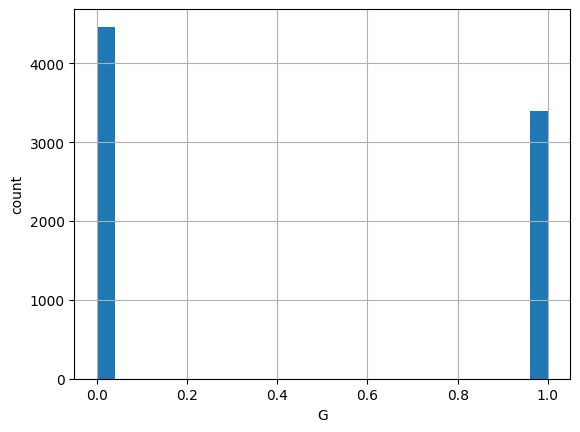

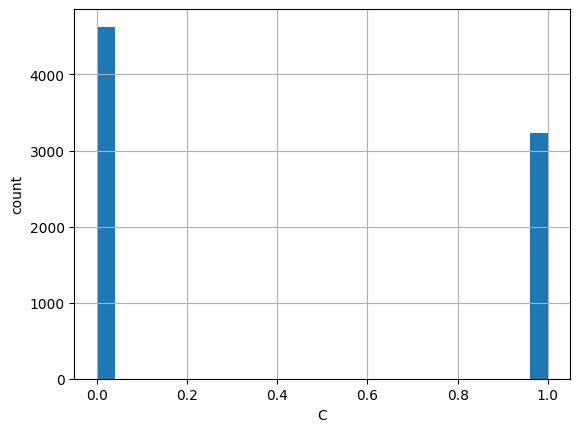

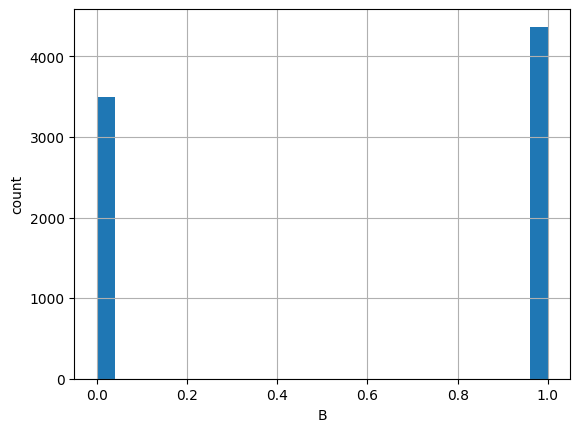

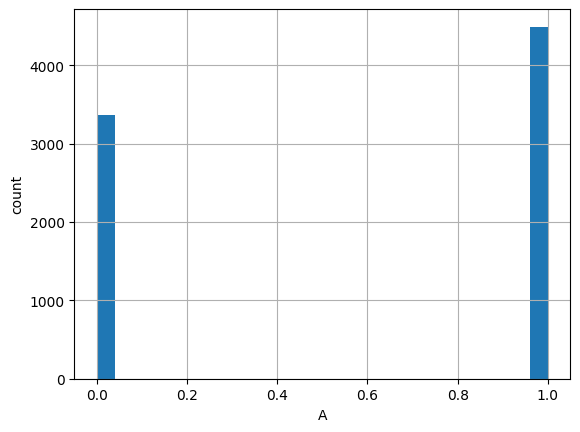

In [15]:
for feature in discrete_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

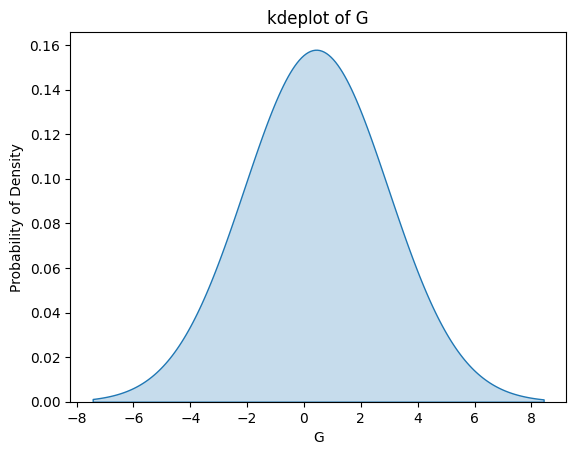

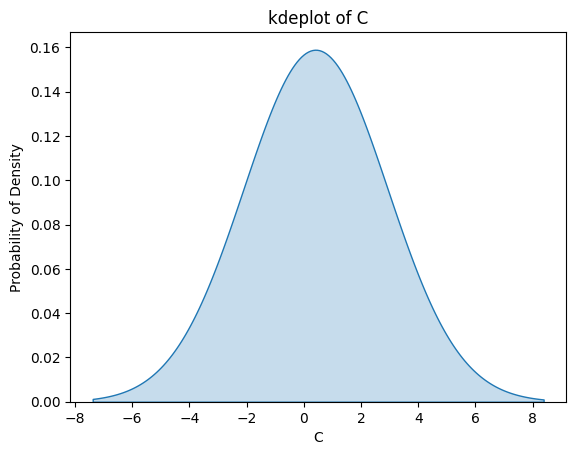

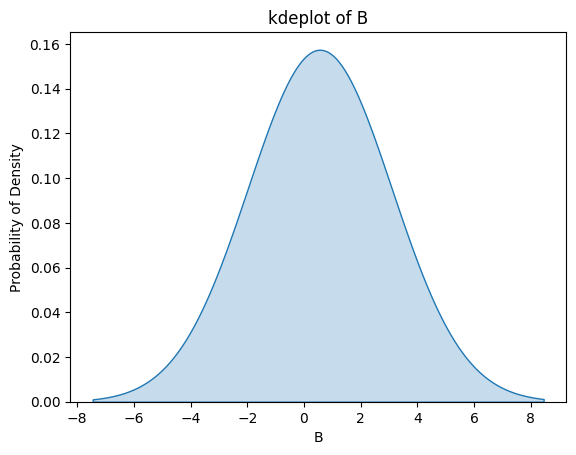

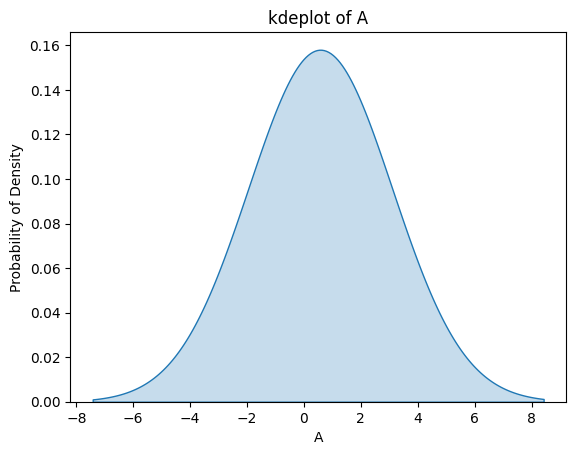

In [16]:
for feature in discrete_feature:
    plt.figure()  # Create a new figure for each plot
    sns.kdeplot(data[feature], fill=True, bw_method=5)
    plt.title('kdeplot of {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel('Probability of Density')
    
# Display the kdeplot
plt.show()

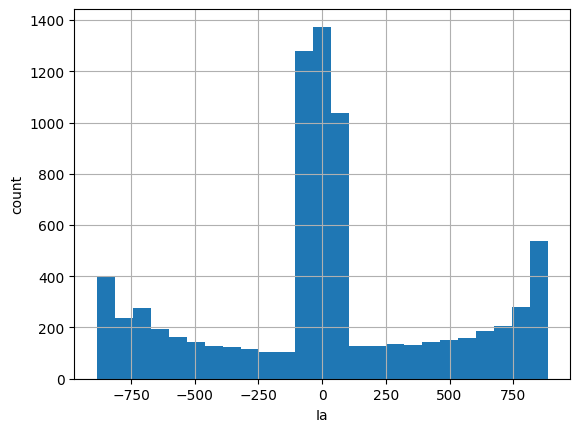

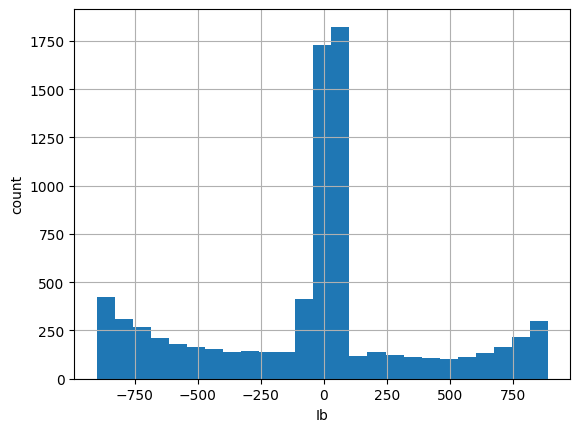

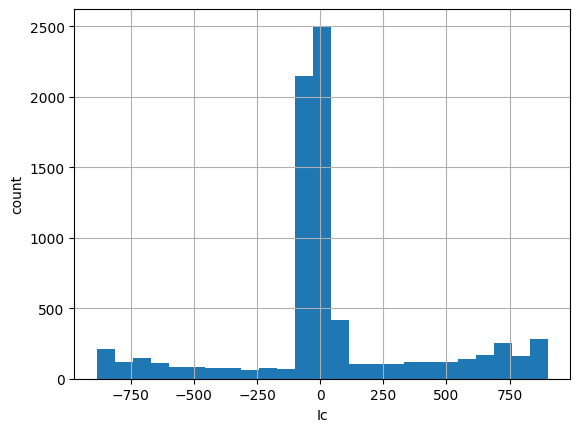

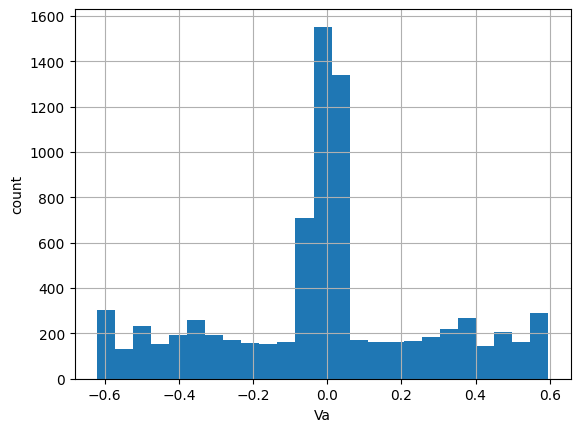

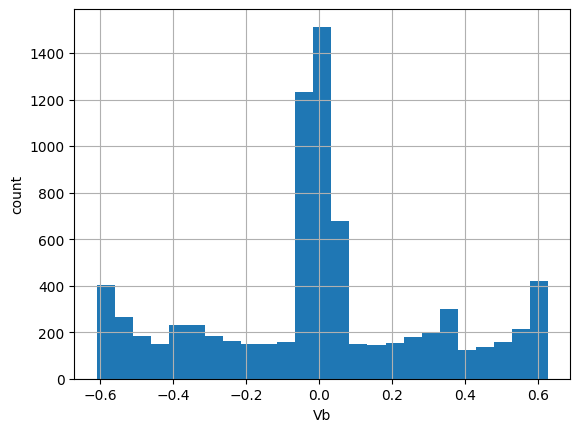

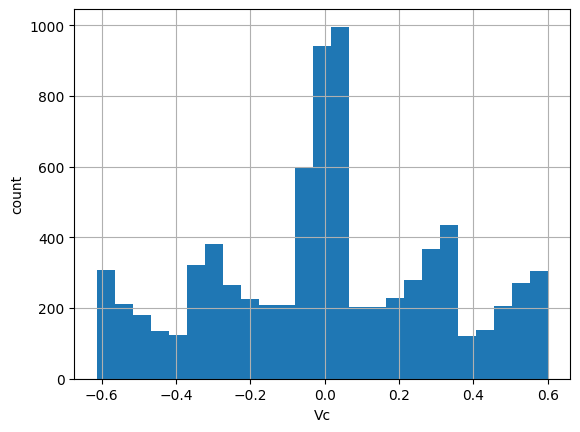

In [17]:
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

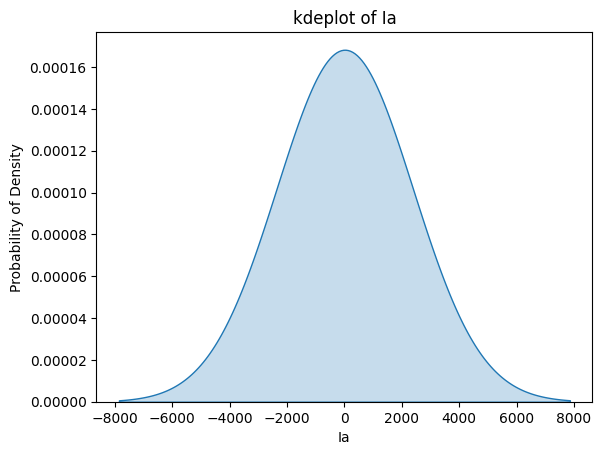

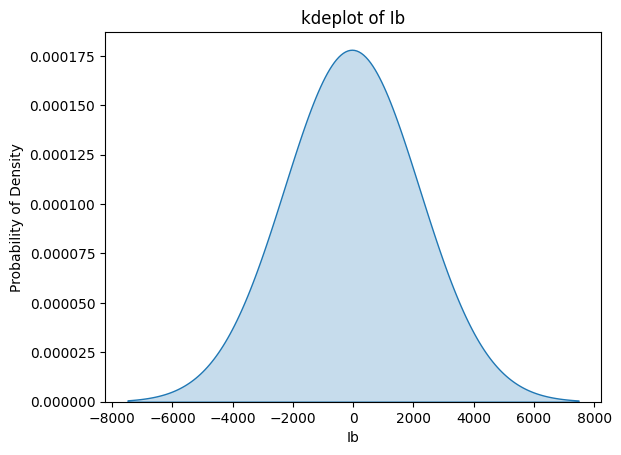

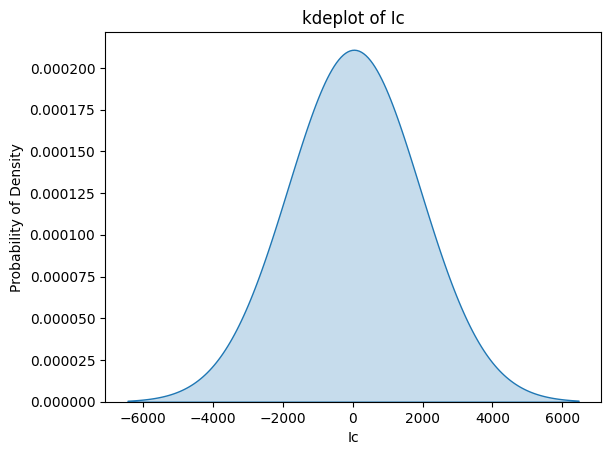

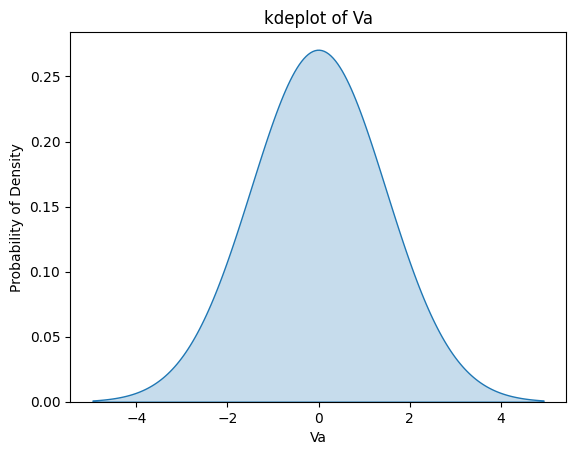

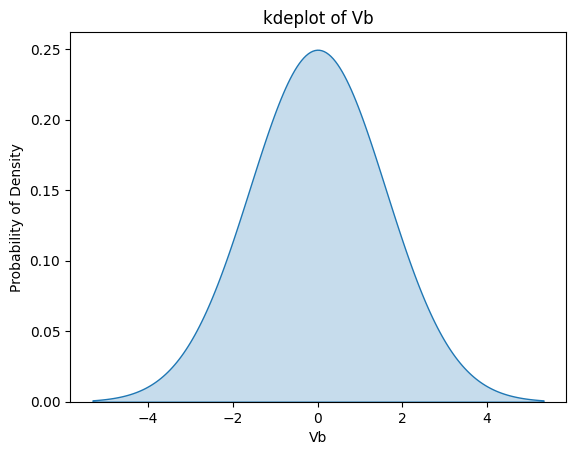

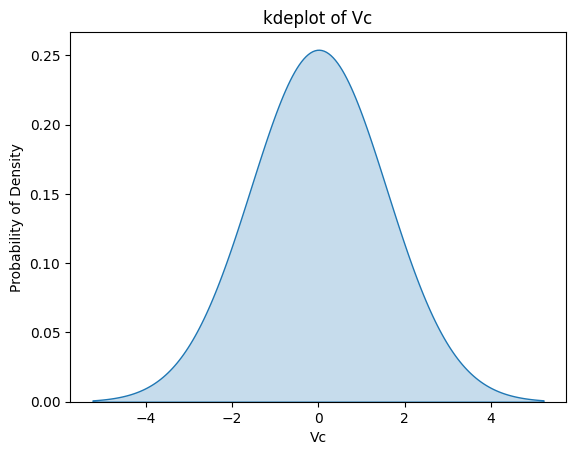

In [18]:
for feature in continuous_feature:
    plt.figure()  # Create a new figure for each boxplot
    sns.kdeplot(data[feature], fill=True, bw_method=5)
    plt.title('kdeplot of {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel('Probability of Density')
    
# Display the kdeplot
plt.show()

In [19]:
# Log Transformation

# for feature in continuous_feature:
#     data=df_class.copy()
#     if 0  in data[feature].unique(): # To avoid log(0) condition. Because log(0) is not defined
#         pass
#     else:
#         data[feature] = np.log(data[feature])
#         data['median_house_value'] = np.log(data['median_house_value'])
#         plt.scatter(data[feature], data['median_house_value'])
#         plt.xlabel(feature)
#         plt.ylabel('median_house_value')
#         plt.show()

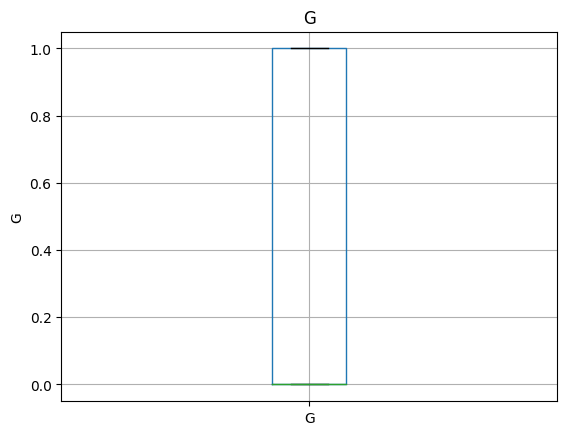

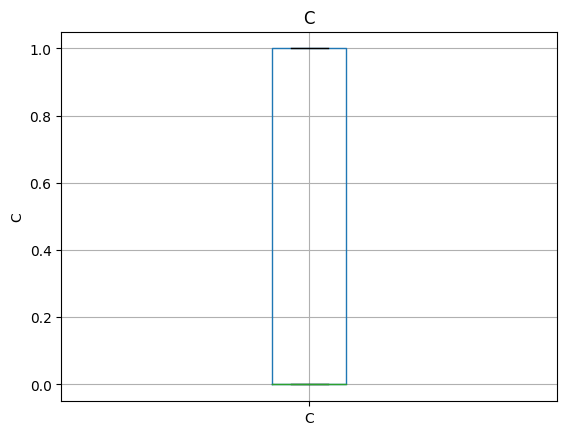

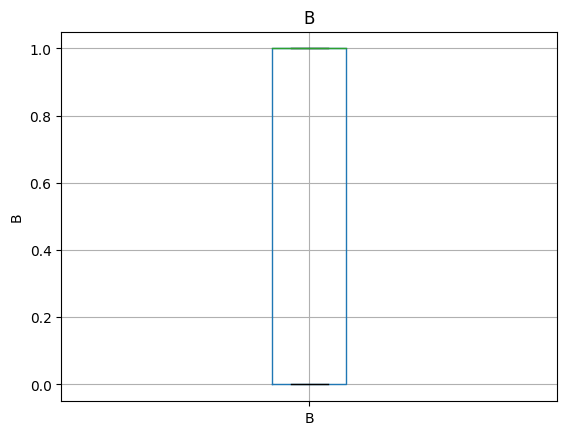

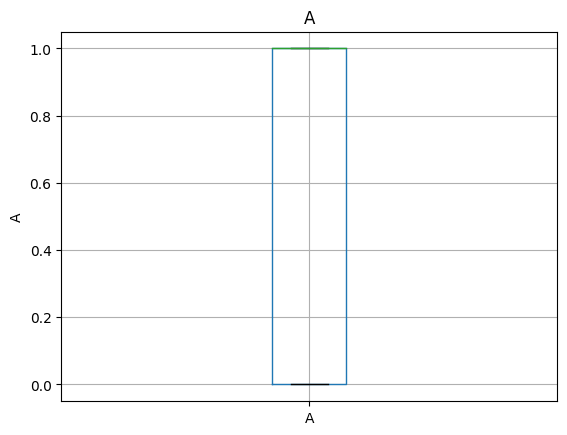

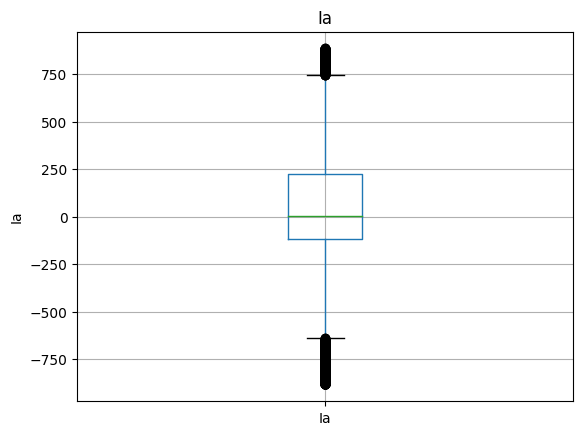

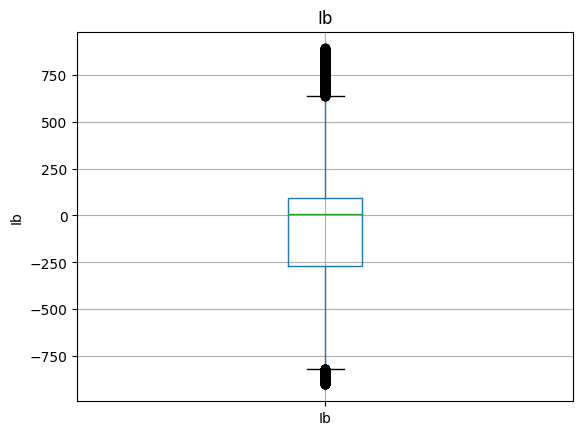

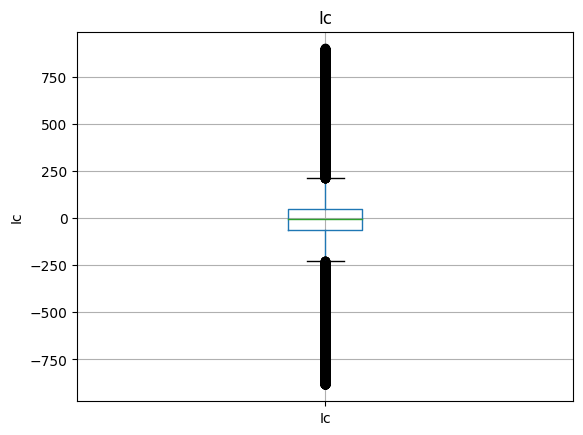

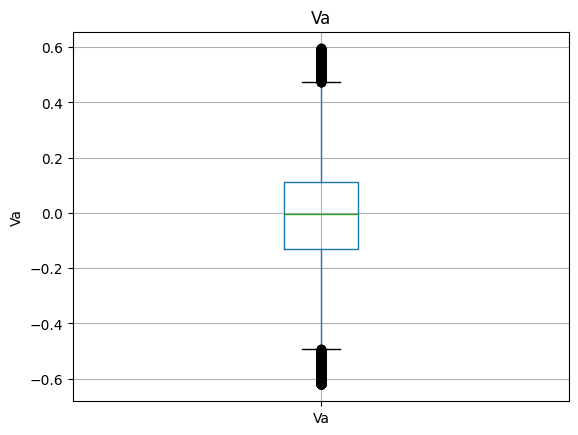

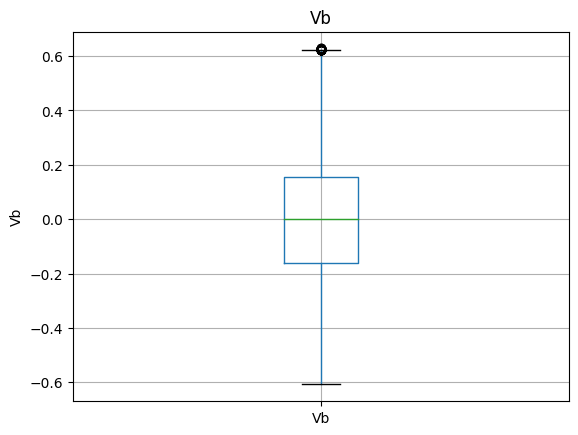

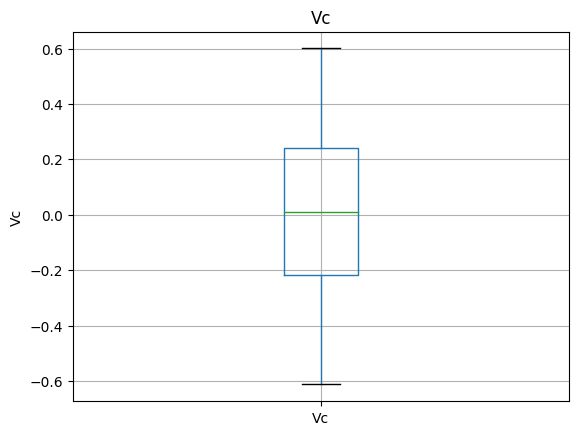

In [20]:
# Outliers Checking

for feature in df.columns:
    data=df.copy()
    data.boxplot(column=feature) # boxplot only with continuous variables not for catagorical
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

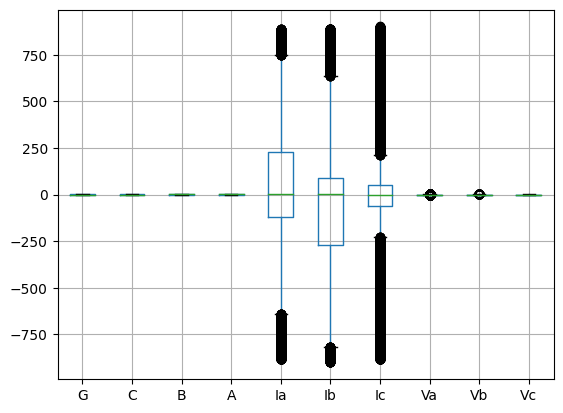

In [21]:
col = df.columns
outliers_bucket = df.boxplot()

### Multivariate Analysis

In [22]:
df.corr()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
G,1.000000,-0.137611,0.196609,0.755273,0.041310,-0.031068,-0.003156,0.023808,-0.024048,0.002122
C,-0.137611,1.000000,0.747612,0.199335,0.000232,-0.109211,0.164323,0.018188,-0.068840,0.052998
B,0.196609,0.747612,1.000000,0.448807,0.014102,-0.139981,0.133321,0.037128,-0.075973,0.042473
A,0.755273,0.199335,0.448807,1.000000,0.036341,-0.074905,0.054071,0.029940,-0.053036,0.025873
Ia,0.041310,0.000232,0.014102,0.036341,1.000000,-0.374241,-0.276457,0.035682,-0.274612,0.246043
Ib,-0.031068,-0.109211,-0.139981,-0.074905,-0.374241,1.000000,-0.528291,0.029118,0.032101,-0.060023
Ic,-0.003156,0.164323,0.133321,0.054071,-0.276457,-0.528291,1.000000,-0.069137,-0.056967,0.122919
Va,0.023808,0.018188,0.037128,0.029940,0.035682,0.029118,-0.069137,1.000000,-0.480247,-0.450225
Vb,-0.024048,-0.068840,-0.075973,-0.053036,-0.274612,0.032101,-0.056967,-0.480247,1.000000,-0.566986
Vc,0.002122,0.052998,0.042473,0.025873,0.246043,-0.060023,0.122919,-0.450225,-0.566986,1.000000


<Axes: >

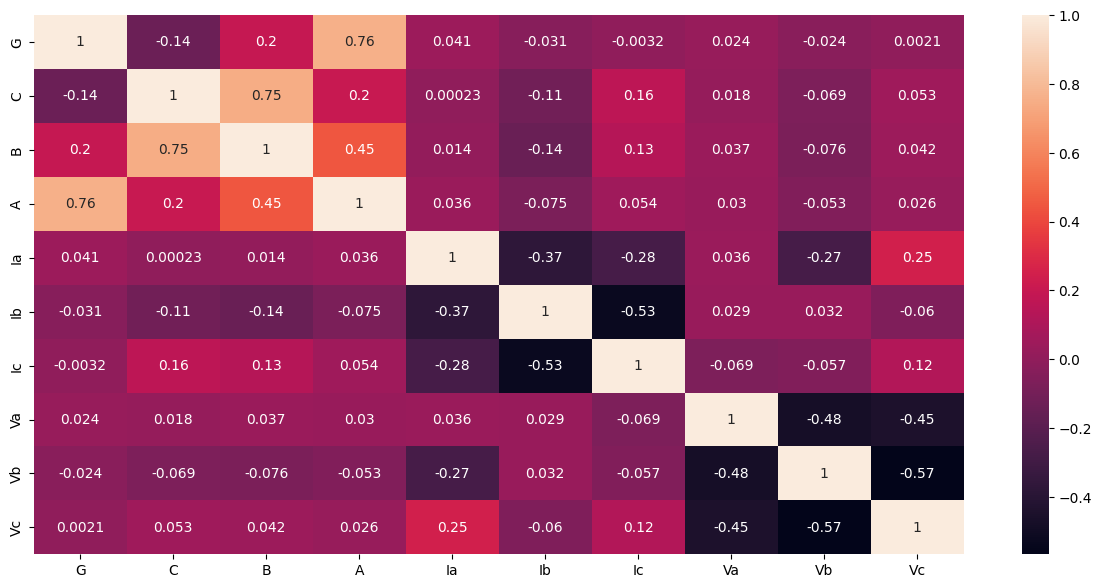

In [23]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

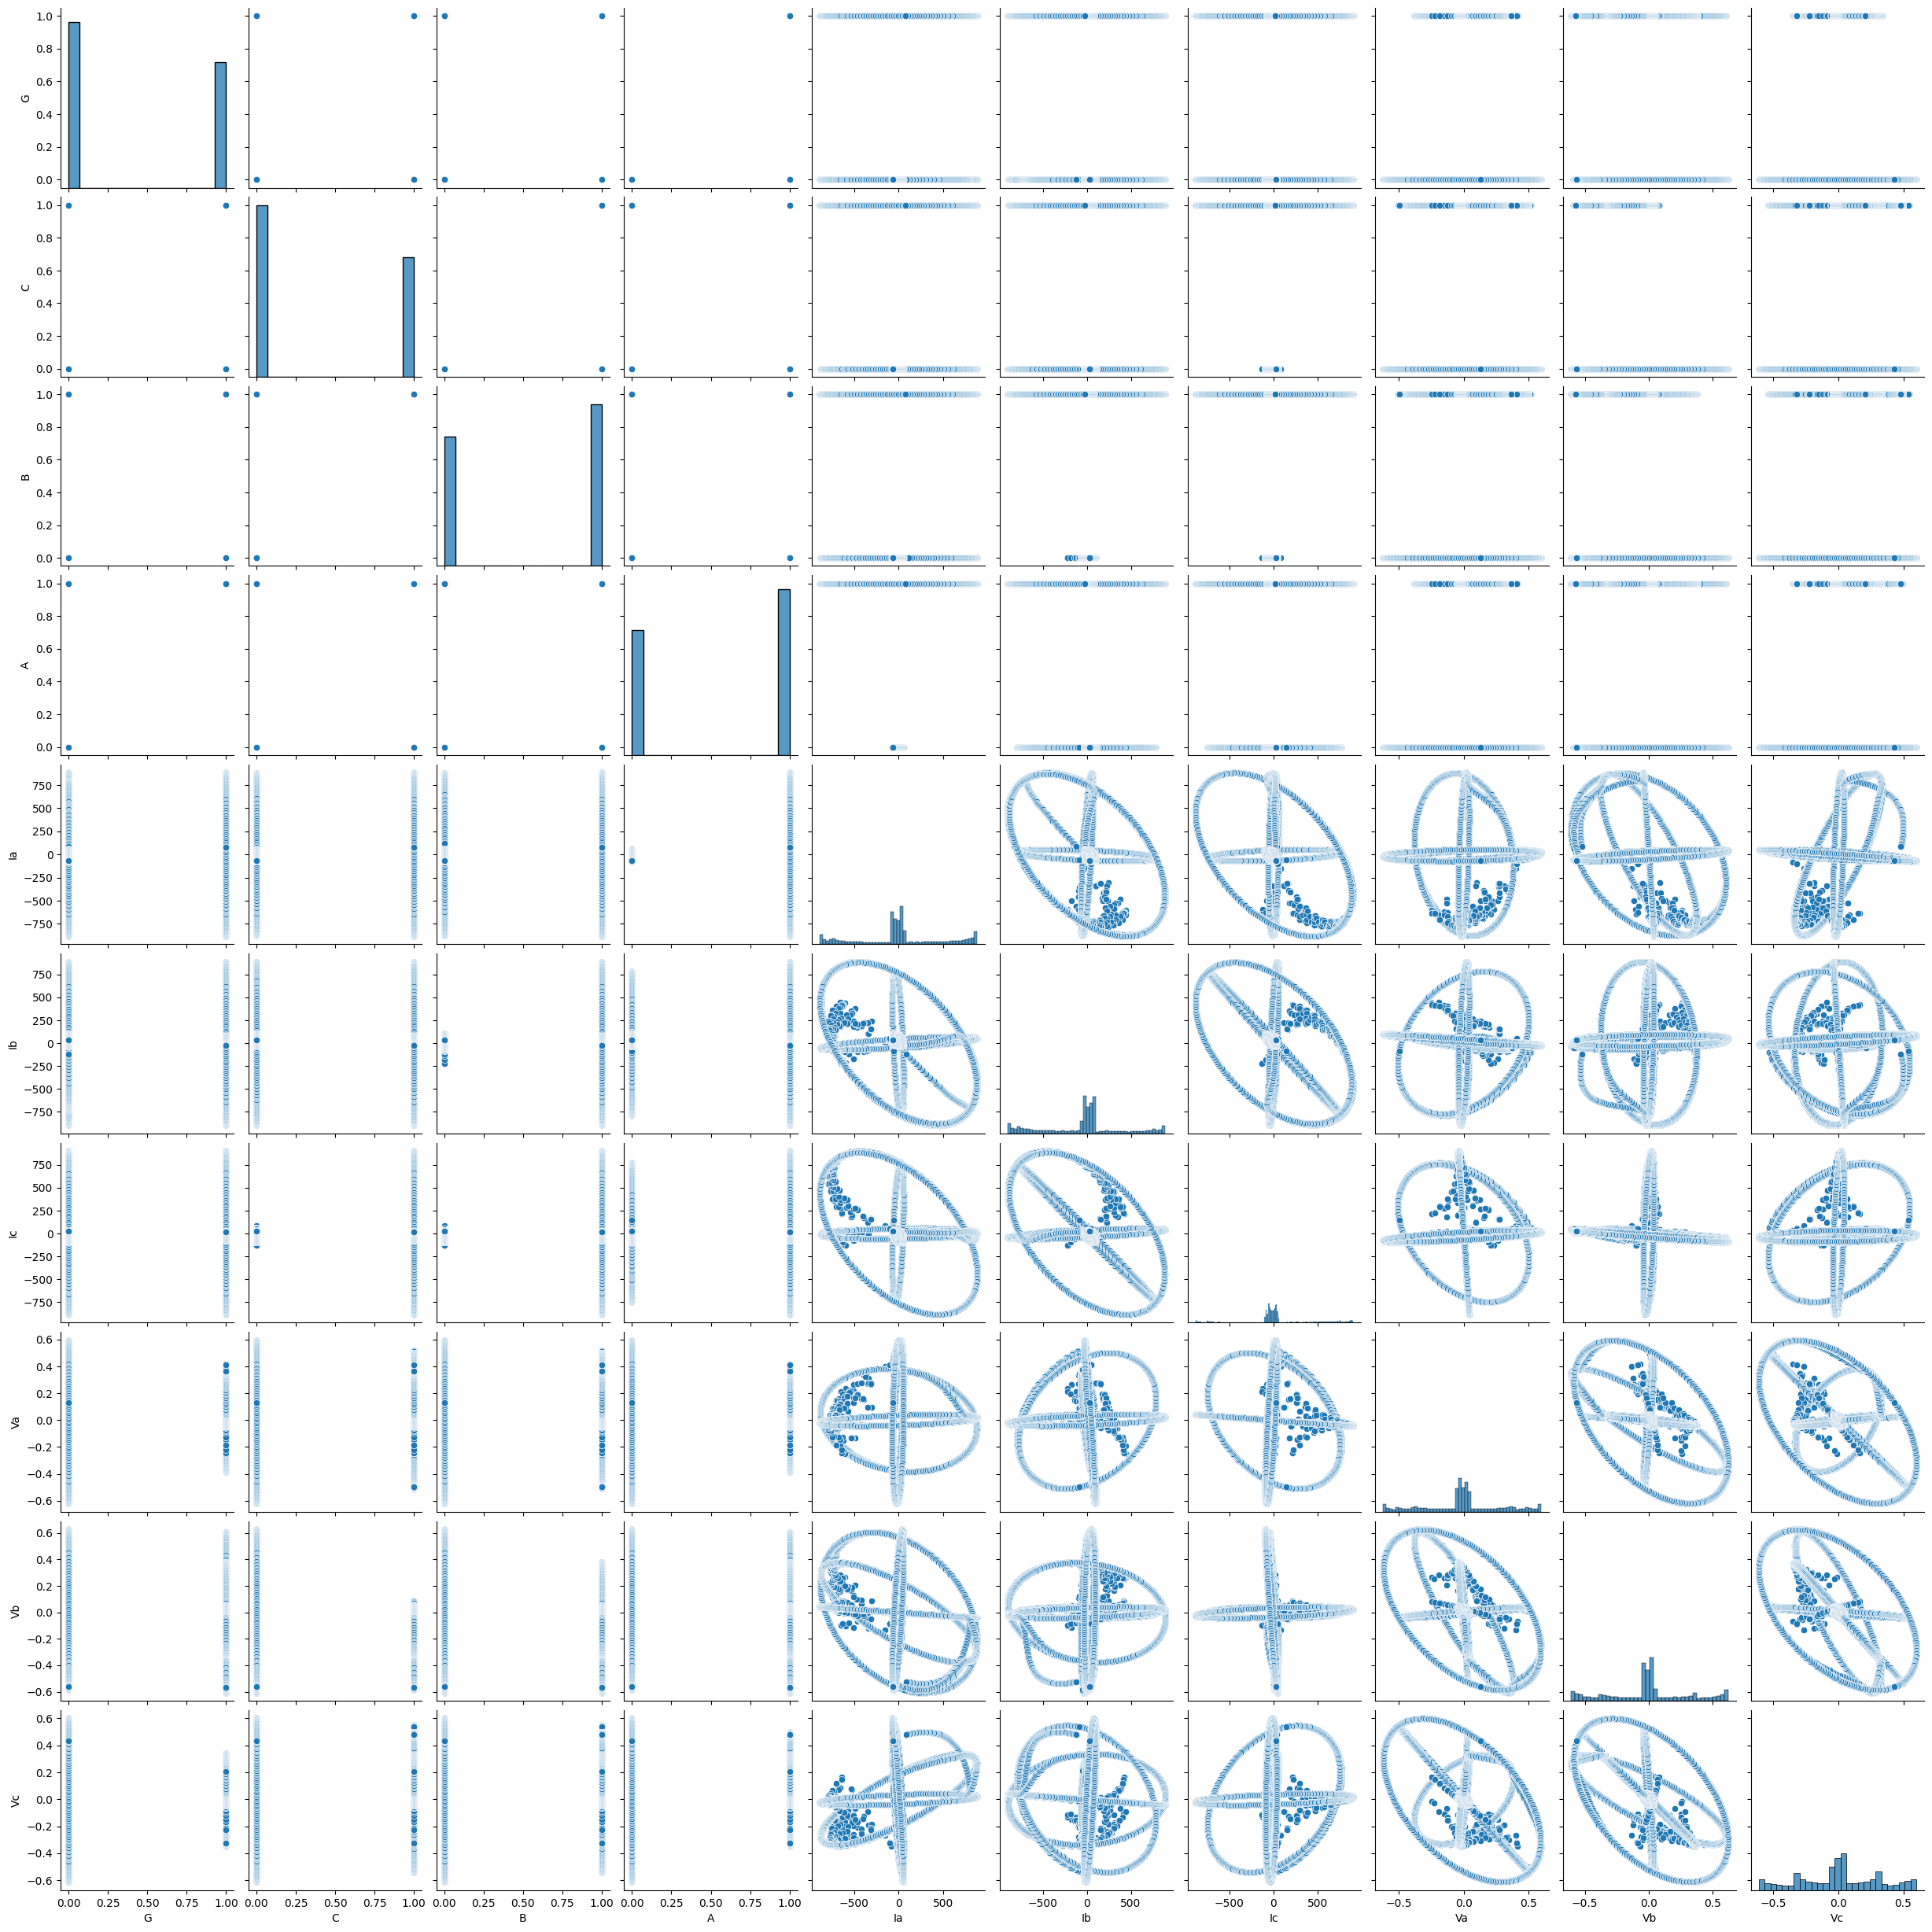

In [24]:
sns.pairplot(df)

# Feature Engineering

In [25]:
df['Fault_Type'] = df['G'].astype('str') + df['C'].astype('str') + df['B'].astype('str') + df['A'].astype('str')

In [26]:
df

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001
...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0000
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0000
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0000
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0000


In [27]:
df['Fault_Type'].unique()

array(['1001', '1011', '0110', '0111', '1111', '0000'], dtype=object)

In [28]:
# Giving the proper name to the fault according to the data description provided above

df['Fault_Type'][df['Fault_Type'] == '0000' ] = 'NO Fault'
df['Fault_Type'][df['Fault_Type'] == '1001' ] = 'Line A to Ground Fault'
df['Fault_Type'][df['Fault_Type'] == '0110' ] = 'Line B to Line C Fault'
df['Fault_Type'][df['Fault_Type'] == '1011' ] = 'Line A Line B to Ground Fault'
df['Fault_Type'][df['Fault_Type'] == '0111' ] = 'Line A Line B Line C'
df['Fault_Type'][df['Fault_Type'] == '1111' ] = 'Line A Line B Line C to Ground Fault'

C:\Users\Digvijay Mohite\AppData\Local\Temp\ipykernel_12196\445954943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fault_Type'][df['Fault_Type'] == '0000' ] = 'NO Fault'
C:\Users\Digvijay Mohite\AppData\Local\Temp\ipykernel_12196\445954943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fault_Type'][df['Fault_Type'] == '1001' ] = 'Line A to Ground Fault'
C:\Users\Digvijay Mohite\AppData\Local\Temp\ipykernel_12196\445954943.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [29]:
df

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault
...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,NO Fault
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,NO Fault
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,NO Fault
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,NO Fault


In [30]:
df['Fault_Type'].value_counts(ascending=False)

Fault_Type
NO Fault                                2365
Line A Line B to Ground Fault           1134
Line A Line B Line C to Ground Fault    1133
Line A to Ground Fault                  1129
Line A Line B Line C                    1096
Line B to Line C Fault                  1004
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Line A to Ground Fault'),
  Text(1, 0, 'Line A Line B to Ground Fault'),
  Text(2, 0, 'Line B to Line C Fault'),
  Text(3, 0, 'Line A Line B Line C'),
  Text(4, 0, 'Line A Line B Line C to Ground Fault'),
  Text(5, 0, 'NO Fault')])

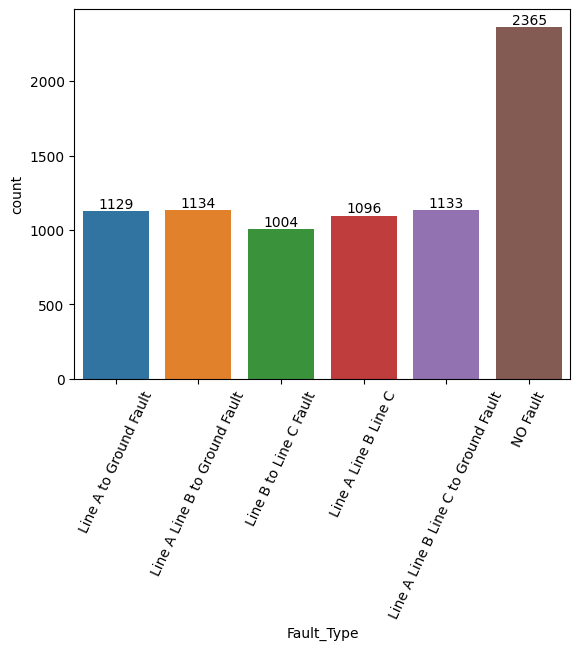

In [31]:
ax = sns.countplot(x='Fault_Type', data=df)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=65)

<Axes: ylabel='count'>

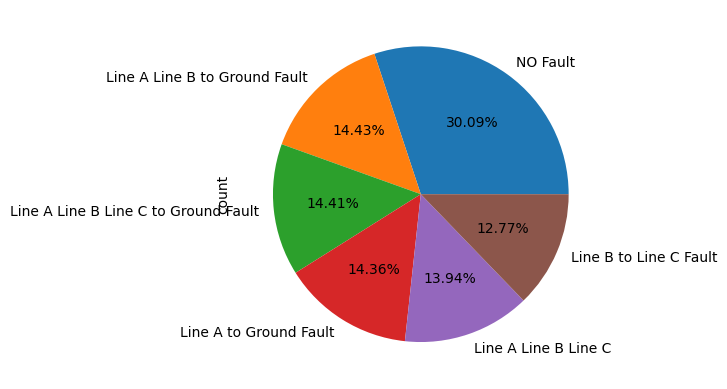

In [32]:
df['Fault_Type'].value_counts().plot.pie(autopct='%1.2f%%')

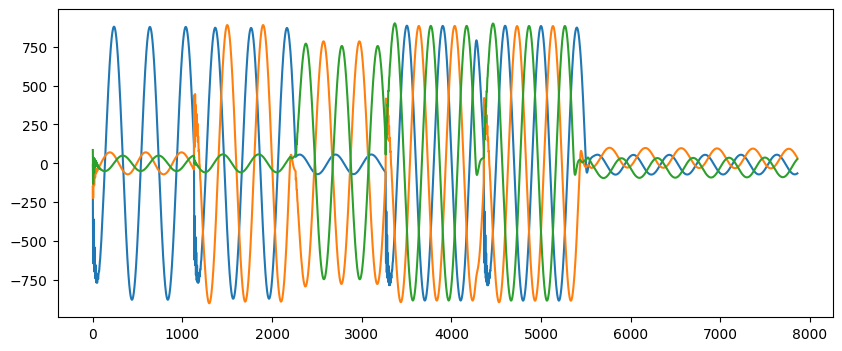

In [33]:
plt.figure(figsize = (10,4))
plt.plot(df["Ia"])
plt.plot(df["Ib"])
plt.plot(df["Ic"]);

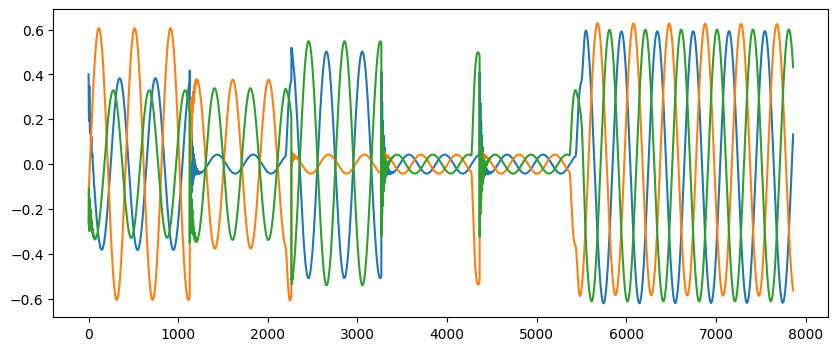

In [34]:
plt.figure(figsize = (10,4))
plt.plot(df["Va"])
plt.plot(df["Vb"])
plt.plot(df["Vc"]);

Voltage or Current graph, where there is large fluctuation in the graph, there faults have occurred

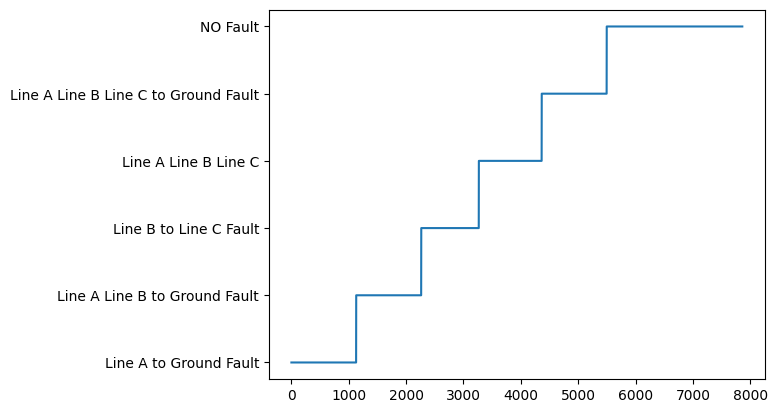

In [35]:
plt.plot(df['Fault_Type'])

### Separating Faults into different Categories

###### 1. No Fault (Healthy System)

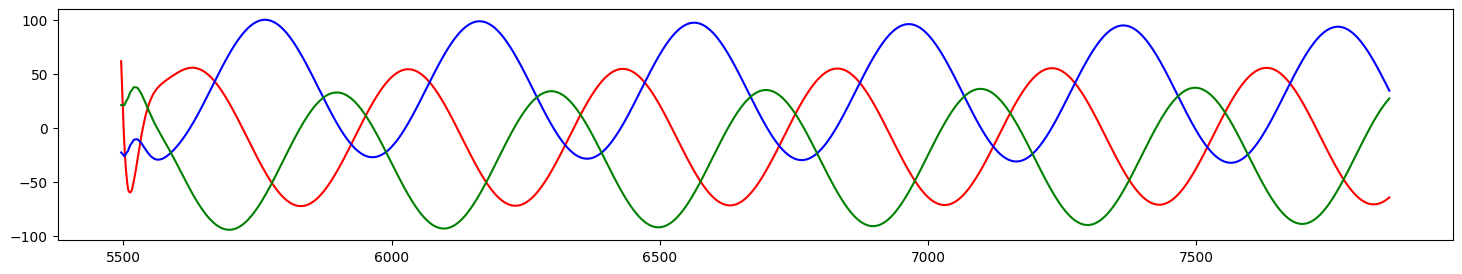

In [36]:
No_Fault = df[df['Fault_Type'] == 'NO Fault' ]
ax = plt.figure(figsize = (18,3))
ax = plt.plot(No_Fault["Ia"],'r')
ax = plt.plot(No_Fault["Ib"],'b')
ax = plt.plot(No_Fault["Ic"],'g');

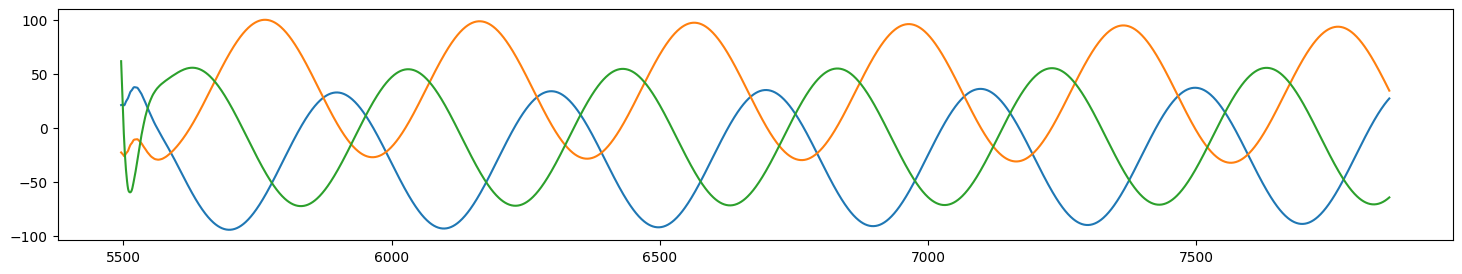

In [37]:
plt.figure(figsize = (18,3))
plt.plot(No_Fault[["Ic","Ib","Ia"]]);

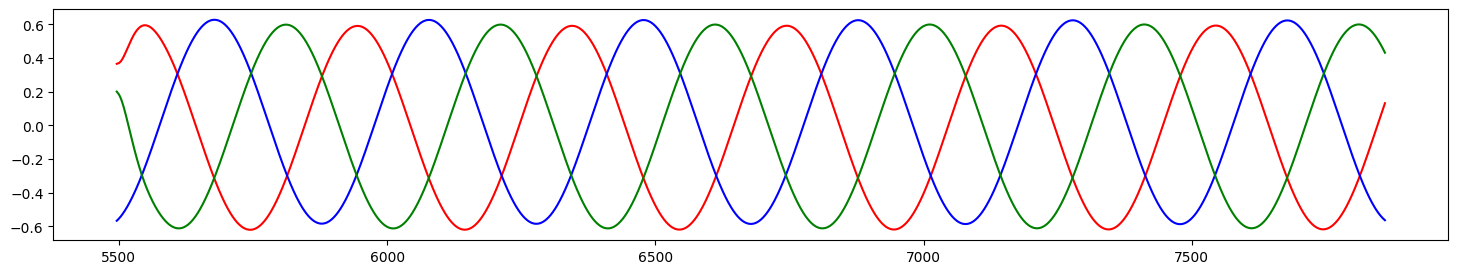

In [38]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(No_Fault["Va"],'r')
ax = plt.plot(No_Fault["Vb"],'b')
ax = plt.plot(No_Fault["Vc"],'g');

In a normal (No_Fault) condition Voltage or Current graph, is symmetrical and sinusoidal in nature with current and voltage 120 degree in phase shift and maximum current is approximately +100 to -100 Amperes and voltage +0.5 pu to -0.5pu

###### 2. Faulty System with Line A to Ground Fault

In [39]:
Line_AG_Fault = df[df['Fault_Type'] == 'Line A to Ground Fault' ]

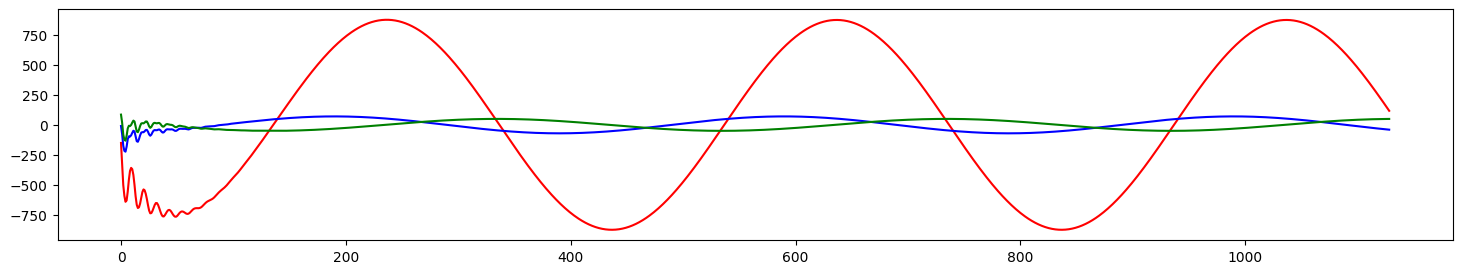

In [40]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_AG_Fault["Ia"],'r')
ax = plt.plot(Line_AG_Fault["Ib"],'b')
ax = plt.plot(Line_AG_Fault["Ic"],'g');

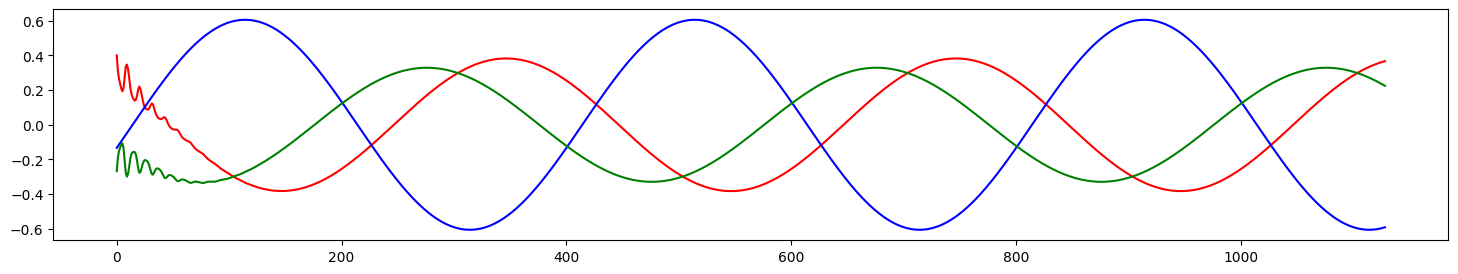

In [41]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_AG_Fault["Va"],'r')
ax = plt.plot(Line_AG_Fault["Vb"],'b')
ax = plt.plot(Line_AG_Fault["Vc"],'g');

At a time of Line A to grounf fault the current in line A increases to 10 fold approximately 1000 Ampears form normal 100 Ampears and voltage reduced.

###### 3. Faulty System with Line A ,Line B to Ground Fault

In [42]:
Line_ABG_Fault = df[df['Fault_Type'] == 'Line A Line B to Ground Fault' ]

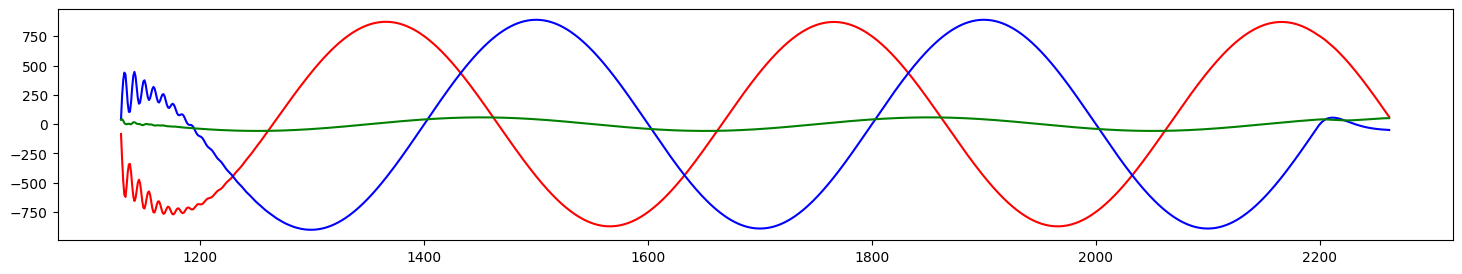

In [43]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABG_Fault["Ia"],'r')
ax = plt.plot(Line_ABG_Fault["Ib"],'b')
ax = plt.plot(Line_ABG_Fault["Ic"],'g');

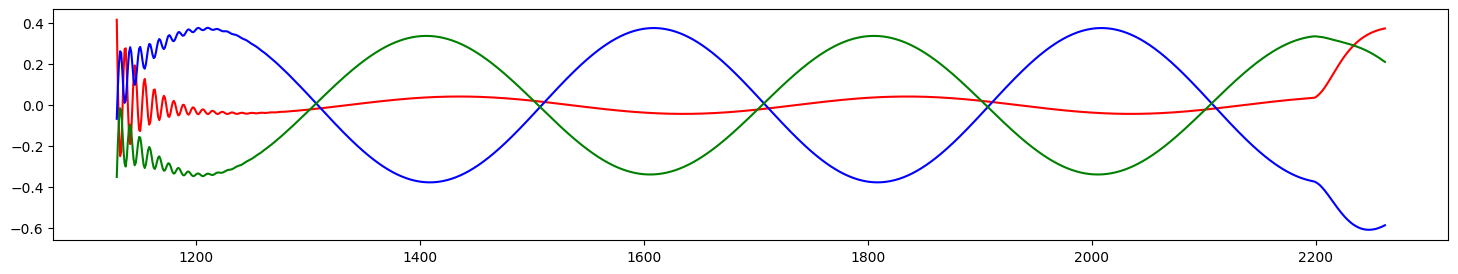

In [44]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABG_Fault["Va"],'r')
ax = plt.plot(Line_ABG_Fault["Vb"],'b')
ax = plt.plot(Line_ABG_Fault["Vc"],'g');

###### 4. Faulty System with Line B to Line C

In [45]:
Line_BC_Fault = df[df['Fault_Type'] == 'Line B to Line C Fault' ]

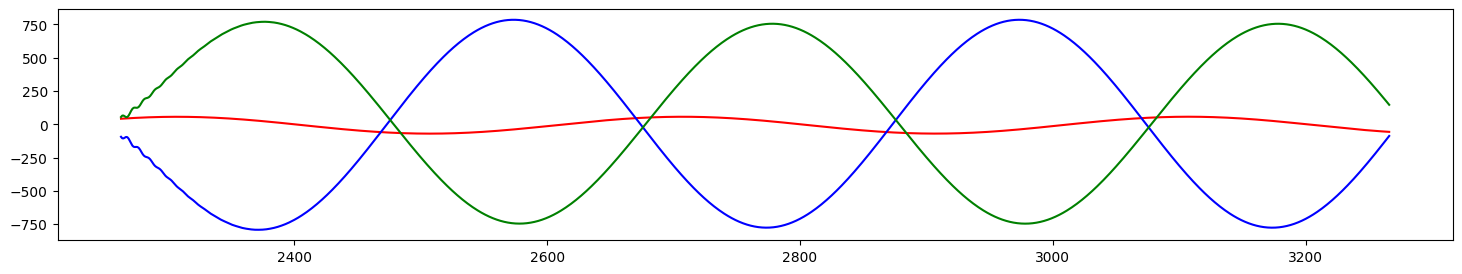

In [46]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_BC_Fault["Ia"],'r')
ax = plt.plot(Line_BC_Fault["Ib"],'b')
ax = plt.plot(Line_BC_Fault["Ic"],'g');

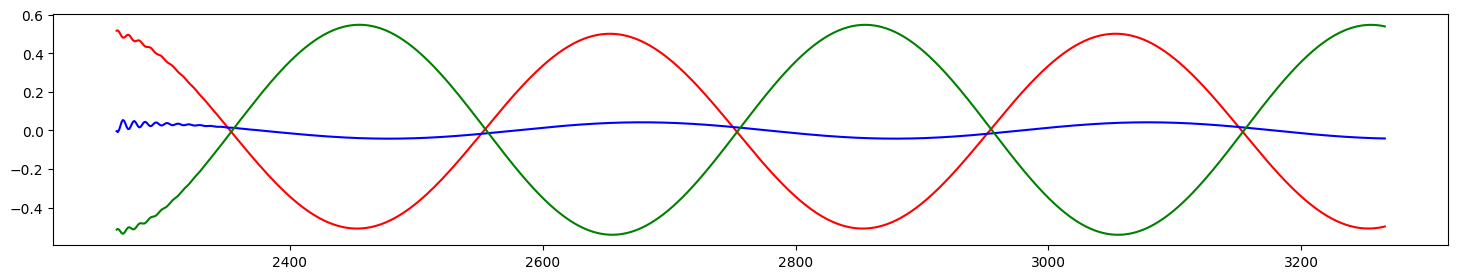

In [47]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_BC_Fault["Va"],'r')
ax = plt.plot(Line_BC_Fault["Vb"],'b')
ax = plt.plot(Line_BC_Fault["Vc"],'g');

###### 5. Faulty System with Line A - Line B - Line C

In [48]:
Line_ABC_Fault = df[df['Fault_Type'] == 'Line A Line B Line C' ]

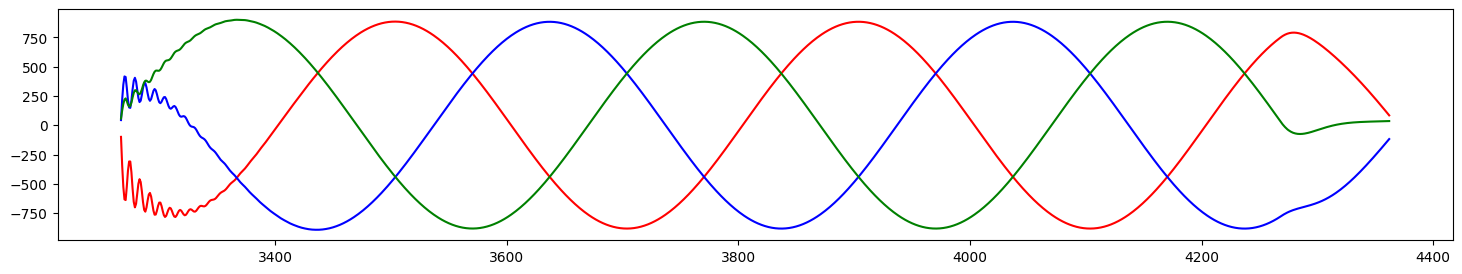

In [49]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABC_Fault["Ia"],'r')
ax = plt.plot(Line_ABC_Fault["Ib"],'b')
ax = plt.plot(Line_ABC_Fault["Ic"],'g');

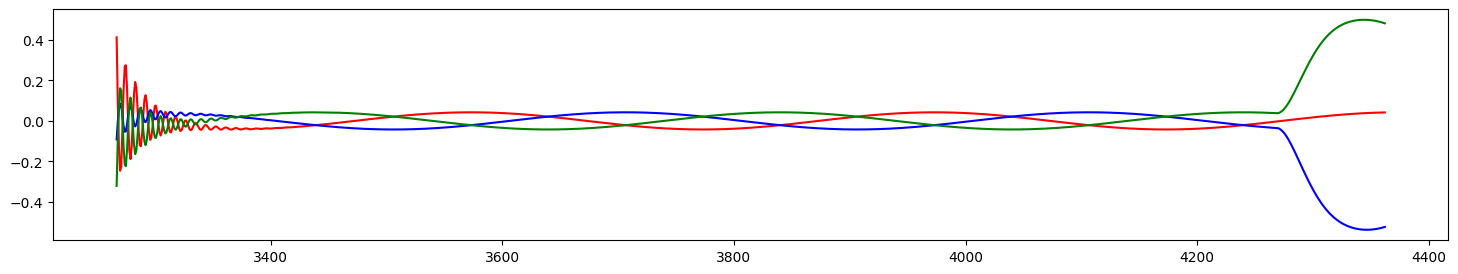

In [50]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABC_Fault["Va"],'r')
ax = plt.plot(Line_ABC_Fault["Vb"],'b')
ax = plt.plot(Line_ABC_Fault["Vc"],'g');

###### 6. Faulty System with Line A - Line B - Line C - Ground

In [51]:
Line_ABCG_Fault = df[df['Fault_Type'] == 'Line A Line B Line C to Ground Fault' ]

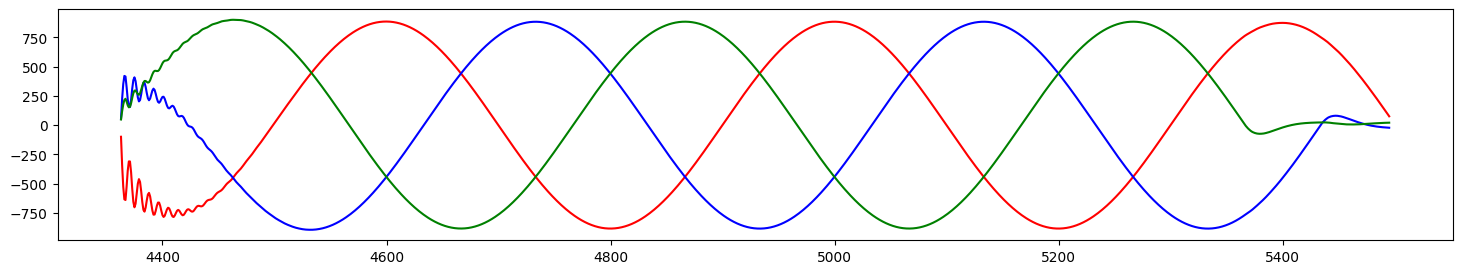

In [52]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABCG_Fault["Ia"],'r')
ax = plt.plot(Line_ABCG_Fault["Ib"],'b')
ax = plt.plot(Line_ABCG_Fault["Ic"],'g');

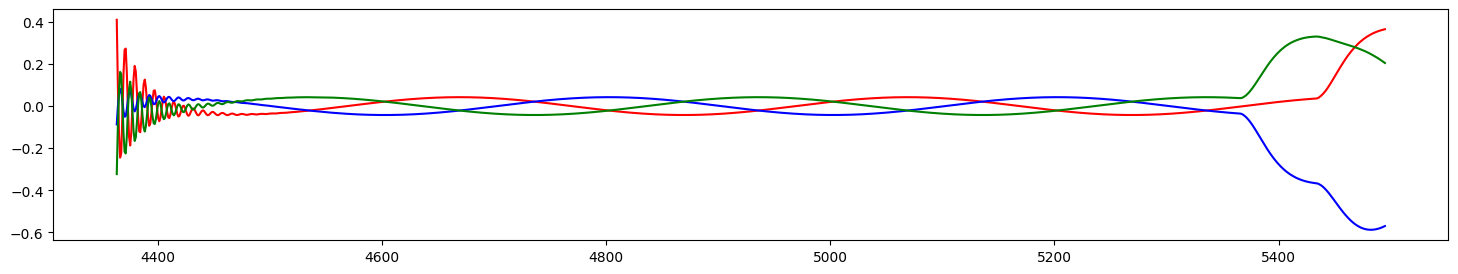

In [53]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABCG_Fault["Va"],'r')
ax = plt.plot(Line_ABCG_Fault["Vb"],'b')
ax = plt.plot(Line_ABCG_Fault["Vc"],'g');

### Feature and Label seperation

###### Categorical to Numerical conversion

In [54]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Fault_Type'] = encoder.fit_transform(df['Fault_Type'])
df.sample(10)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
5014,1,1,1,1,861.646938,-261.481959,-600.167243,0.027451,-0.041608,0.014158,1
4904,1,1,1,1,58.629443,-793.054080,734.422379,-0.036161,-0.001026,0.037186,1
2857,0,1,1,0,-51.154790,-195.747548,249.236562,-0.507621,-0.039971,0.547591,4
5482,1,1,1,1,251.094185,-9.410449,15.360425,0.339325,-0.587594,0.248270,1
145,1,0,0,1,128.699491,53.996266,-49.338943,-0.381989,0.535852,-0.153862,3
1983,1,0,1,1,-839.571567,233.009714,-27.941591,-0.028971,0.346293,-0.317323,2
2442,0,1,1,0,-39.708982,-369.387738,411.537529,-0.500951,-0.035850,0.536801,4
3126,0,1,1,0,54.209175,-568.911763,517.219031,0.205024,0.031069,-0.236093,4
4832,1,1,1,1,-772.739734,15.137709,757.599792,-0.035406,0.037900,-0.002494,1
1107,1,0,0,1,393.201031,-19.093889,45.403913,0.311726,-0.602172,0.290446,3


### Dependent and Independent Variable Sepration

In [55]:
X = df.drop(['Fault_Type'],axis=1)
y = df['Fault_Type']

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)

In [57]:
X_train.shape

(6288, 10)

In [58]:
X_test.shape

(1573, 10)

In [59]:
y_train.shape

(6288,)

In [60]:
y_test.shape

(1573,)

## Model Selection

### 1. Logistic Regression

In [61]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [62]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("--------------------------------------------------------")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))

Training Accuracy    : 90.2 %
Model Accuracy Score : 89.57 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.56      1.00      0.72       213
           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      0.17      0.29       198
           5       1.00      1.00      1.00       456

    accuracy                           0.90      1573
   macro avg       0.93      0.86      0.84      1573
weighted avg       0.94      0.90      0.87      1573



C:\Users\Digvijay Mohite\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2. Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("--------------------------------------------------------")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))

Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      1.00      1.00       198
           5       1.00      1.00      1.00       456

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573



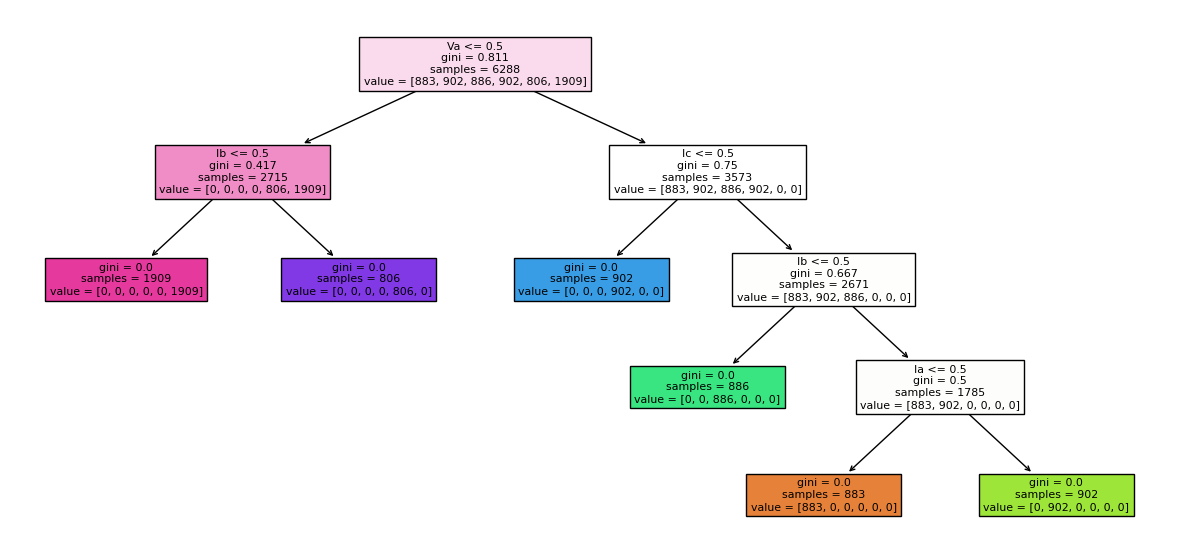

In [65]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7))
plot_tree(decision,filled=True,feature_names=['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'])
plt.show()

In [66]:
from sklearn import tree
def tree_plot(model_name):
    plt.figure(figsize=(20,20))
    features = df.columns
    classes = ['NO Fault','Line A to Ground Fault','Line B to Line C Fault','Line A Line B to Ground Fault','Line A Line B Line C','Line A Line B Line C to Ground Fault']
    tree.plot_tree(model_name,feature_names=features,class_names=classes,filled=True)
    plt.show()

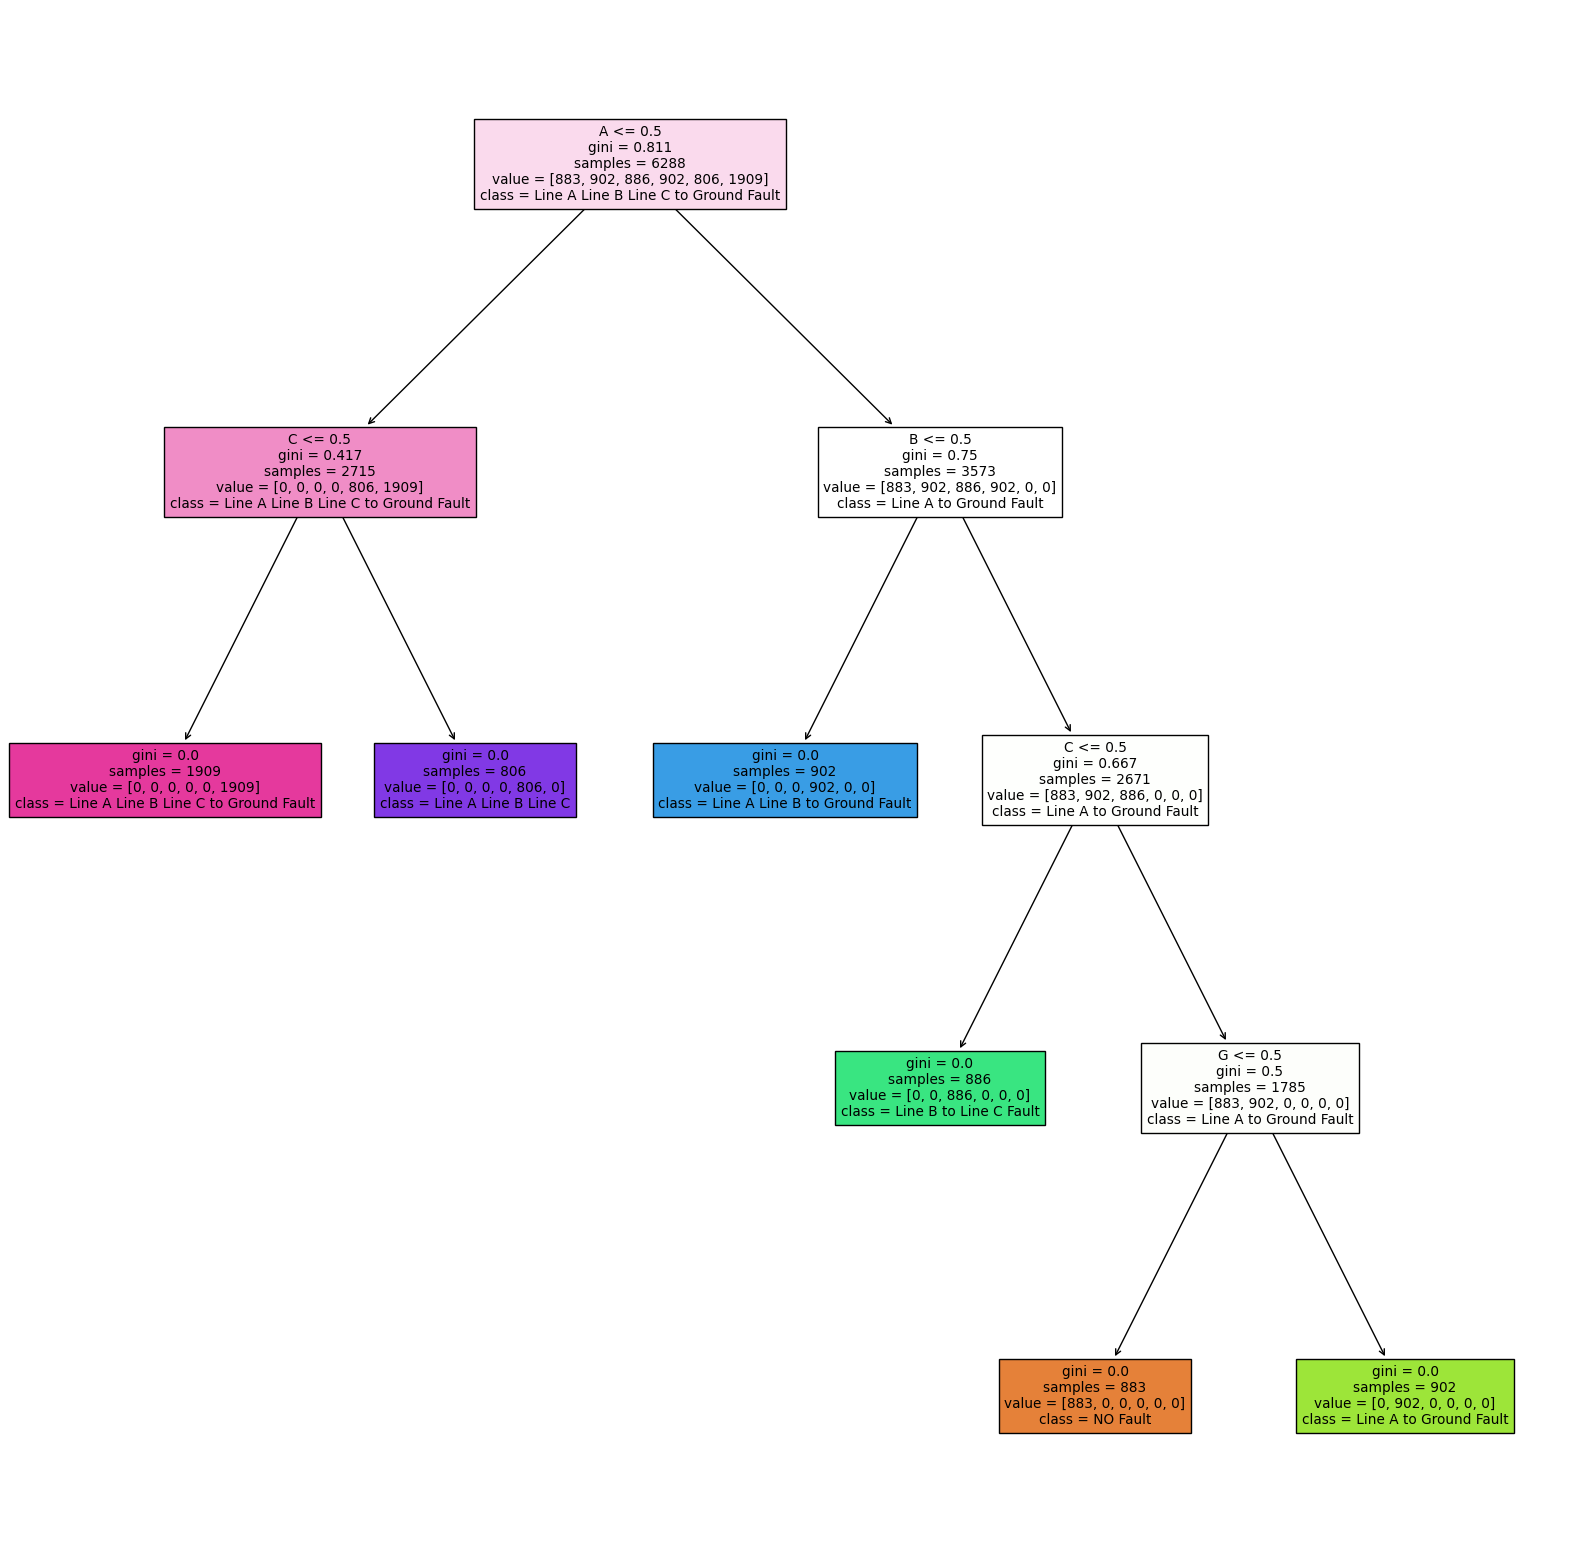

In [67]:
tree_plot(decision)

### 3. Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("--------------------------------------------------------")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))

Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      1.00      1.00       198
           5       1.00      1.00      1.00       456

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573



### 4. XGB Classifier

In [70]:
# pip install xgboost

In [71]:
import xgboost as Xgb

xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)

print("Training Accuracy    :",xgb_train ,"%")
print("Model Accuracy Score :",xgb_accuracy ,"%")
print("--------------------------------------------------------")
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))

Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      1.00      1.00       198
           5       1.00      1.00      1.00       456

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573



### 5. Support Vector Machines

In [72]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("--------------------------------------------------------")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))

Training Accuracy    : 76.51 %
Model Accuracy Score : 74.19 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.48      0.35      0.40       213
           1       0.43      0.29      0.35       231
           2       0.75      0.83      0.78       248
           3       0.77      0.86      0.81       227
           4       0.79      0.86      0.82       198
           5       0.87      1.00      0.93       456

    accuracy                           0.74      1573
   macro avg       0.68      0.70      0.68      1573
weighted avg       0.71      0.74      0.72      1573



## Comparing Different Models

In [73]:
models = pd.DataFrame({
                        'Model': [
                                    'Support Vector Machines', 'Logistic Regression', 'Random Forest',
                                    'Decision Tree', 'XGBClassifier'
                                 ],
    
                        'Training Accuracy':
                                 [log_train, svc_train, decision_train, random_forest_train, xgb_train],
    
                        'Model Accuracy Score': [
                                 log_accuracy, svc_accuracy, decision_accuracy, random_forest_accuracy,
                                 xgb_accuracy
                                                ]
                      })

models

,Model,Training Accuracy,Model Accuracy Score
0,Support Vector Machines,90.20,89.57
1,Logistic Regression,76.51,74.19
2,Random Forest,100.00,100.00
3,Decision Tree,100.00,100.00
4,XGBClassifier,100.00,100.00


## Result Prediction

### 1. Random Forest Classifier

In [74]:
prediction1 = random_forest.predict(X_test)
print(prediction1)

cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
cross_checking.sample(5)

[1 0 0 ... 0 0 5]


,Actual,Predicted
3376,0,0
7475,5,5
1713,2,2
2443,4,4
1342,2,2


### 2. Decision Tree Classifier 

In [75]:
prediction2 = decision.predict(X_test)
print(prediction2)

cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction2})
cross_checking.sample(5)

[1 0 0 ... 0 0 5]


,Actual,Predicted
1684,2,2
3619,0,0
3641,0,0
3458,0,0
2614,4,4


### 3. XGB Classifier

In [76]:
prediction3 = xgb.predict(X_test)
print(prediction3)

cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction3})
cross_checking.sample(5)

[1 0 0 ... 0 0 5]


,Actual,Predicted
1075,3,3
5242,1,1
2520,4,4
2229,2,2
6164,5,5


### 4. Support Vector Machines

In [77]:
prediction4 = svc.predict(X_test)
print(prediction4)

cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction4})
cross_checking.sample(5)

[0 2 1 ... 0 2 5]


,Actual,Predicted
1668,2,2
4506,1,4
2492,4,4
7097,5,5
912,3,3


### 5. Logistic Regression

In [78]:
prediction5 = logreg.predict(X_test)
print(prediction5)

cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction5})
cross_checking.sample(5)

[1 0 0 ... 0 0 5]


,Actual,Predicted
6753,5,5
5444,1,1
7546,5,5
4466,1,1
4147,0,0


**Random Forest, Decision Tree Classifier, XGB Classifier are giving the best Result with 100 % accuracy and is doing a great job till now in Fault Detection**

**Rest of the models because it's able to predict all the signals in most efficient manner while in other models there are cases where there is actually fault but the model is not able to identify it**

**Logistic Regression is giving the worst accuracy**